# Part 1: Creating a 3D plot

In [2]:
import numpy as np                       # vectorized operations with vectors/matrices and etc.
import matplotlib.pyplot as plt          # for ploting 
from mpl_toolkits.mplot3d import Axes3D  # ploting in 3D

#### Let's create two equally ranged vectors

In [4]:
x = np.arange(-10, 10, 0.5)
y = np.arange(-10, 10, 0.5)

In [5]:
print("x =", x, f"x.shape: {x.shape}", sep='\n')

x =
[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]
x.shape: (40,)


In [6]:
# using meshgrid, to convert x, y to suitable base axes for 3D plotting

X, Y = np.meshgrid(x, y)

In [7]:
print("X =", X, f"X.shape: {X.shape}", sep='\n')
# repeats x, 40 times in rows

X =
[[-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 ...
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]]
X.shape: (40, 40)


In [8]:
print("Y =", Y, f"Y.shape: {Y.shape}", sep='\n')
# repeats y, 40 times in columns

Y =
[[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.5  -9.5  -9.5 ...  -9.5  -9.5  -9.5]
 [ -9.   -9.   -9.  ...  -9.   -9.   -9. ]
 ...
 [  8.5   8.5   8.5 ...   8.5   8.5   8.5]
 [  9.    9.    9.  ...   9.    9.    9. ]
 [  9.5   9.5   9.5 ...   9.5   9.5   9.5]]
Y.shape: (40, 40)


In [9]:
# define Z as a function of X and Y

Z = X ** 2 + np.sqrt(np.abs(Y))

#### Now it's time to create a 3D plot with contours

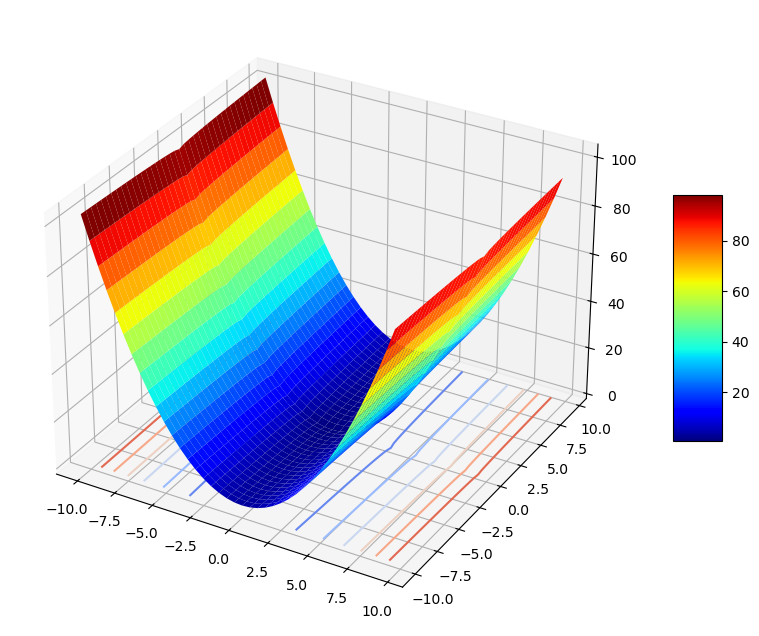

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet')
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap='coolwarm')
fig.colorbar(surf, shrink=0.4, aspect=5)

plt.show()

# Part 2: Normal Equation
> ### Let's see how to solve <u>*normal equations*</u> using numpy ***linear algebra*** sub package

In [13]:
# importing pseudo-inverse (pinv)
from numpy.linalg import pinv

In [14]:
# configure numpy arrays printing options
np.set_printoptions(precision=3, sign=' ', suppress=True)

# sign=' ' specifies how positive and negative should be printed
# suppress=True prevents small numbers to be displayed with scientific notation

In [15]:
X = np.array([[2104, 5, 1, 45],
              [1416, 3, 2, 40],
              [1534, 3, 2, 30],
              [852, 2, 1, 36]])

# add column of ones to X matrix:
X = np.c_[np.ones(X.shape[0]), X]

In [16]:
y = np.array((460, 232, 315, 178), ndmin=2).T

# second approach:
# y = np.array([460, 232, 315, 178], dtype=np.float32).reshape(-1, 1)

In [17]:
print(f"X:\n{X}", f"y:\n{y}", sep='\n')

X:
[[    1.  2104.     5.     1.    45.]
 [    1.  1416.     3.     2.    40.]
 [    1.  1534.     3.     2.    30.]
 [    1.   852.     2.     1.    36.]]
y:
[[460]
 [232]
 [315]
 [178]]


#### Finding theta:

\begin{equation}
\theta = (X^T X)^{-1} X^T y = X^+ y
\end{equation}

In [19]:
# quick approach
# theta = pinv(X) @ y

# second way, same as above equation:
theta = pinv(X.T @ X) @ X.T @ y

In [20]:
# let's see if theta works correctly

# display the LaTeX expression
from IPython.display import display, Math

display(Math("X \\theta = y"))
print(X @ theta, y, sep='\n\n')
print(f"Are they the same? {np.allclose(X @ theta, y)}")

<IPython.core.display.Math object>

[[ 460.]
 [ 232.]
 [ 315.]
 [ 178.]]

[[460]
 [232]
 [315]
 [178]]
Are they the same? True
